In [2]:
#module import section
%matplotlib inline 
from pandas import Series , DataFrame 
import pandas as	pd
import numpy as	np
from numpy.random import randn
from scipy import stats
import random
import statsmodels.api	as sm 
import pylab as py 
import statistics
import math 
from statsmodels.stats import weightstats as stests

In [7]:
#file import section
imdb =pd.read_csv("https://raw.githubusercontent.com/abhiyagupta/DV_python_data/main/IMDB-Movie-Data.csv", error_bad_lines=False)
imdb.head(5)
 


<ipython-input-7-3765a28b3ad0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imdb =pd.read_csv("https://raw.githubusercontent.com/abhiyagupta/DV_python_data/main/IMDB-Movie-Data.csv", error_bad_lines=False)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
imdb =imdb.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue'}) 
imdb['Runtime']=imdb['Runtime'].astype(float)
imdb['Rating']=imdb['Rating'].astype(float)
imdb['Revenue']=imdb['Revenue'].astype(float)
imdb.fillna(0)
imdb.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121.0,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124.0,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117.0,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108.0,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123.0,6.2,393727,325.02,40.0


# separating out two polulations

In [10]:
run_time_mean_pop=imdb['Runtime'].mean()
run_time_mean_pop

113.172

In [12]:
#let us get count of films with rating greater than population mean of runtime
films_grt_thn_avg= DataFrame(imdb.loc[imdb['Runtime']>run_time_mean_pop]['Title'])
films_grt_thn_avg_cnt= films_grt_thn_avg['Title'].count()

#let us get equal number of records in films_lsr_thn_avg

films_lsr_thn_avg=	DataFrame((imdb.loc[imdb['Runtime']<run_time_mean_pop]['Title']).sample(n=films_grt_thn_avg_cnt))
 
#let us make data frames for these names
films_grt_thn_avg_df=imdb.loc[imdb['Title'].isin(list(films_grt_thn_avg['Title']))]
films_lsr_thn_avg_df=imdb.loc[imdb['Title'].isin(list(films_lsr_thn_avg['Title']))]


# Stating the Hypothesis

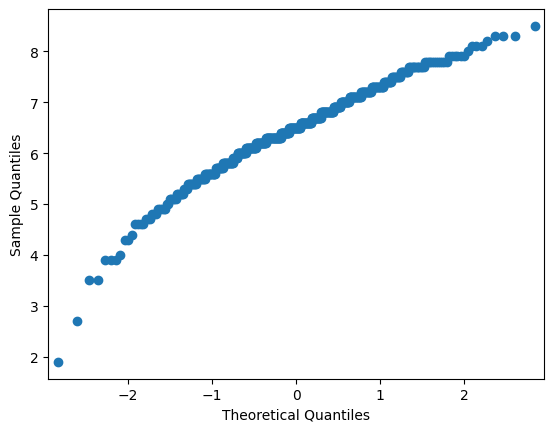

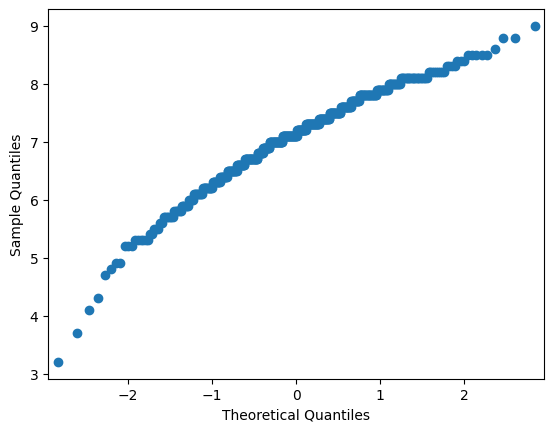

In [13]:
# Now we have two groups : filsm with runtime > 113 minutes and films with runtime < 113 minutes
# we will check if the two groups differ in rating
#mind well, runtime varibale was used to create two groups of data. It will not be used for hypothesis testing
#Hypothesis testing will be done on 'Rating'

#H0: Rating for films with runtime <avg and for films with runtime > average are same/unbiased.
#mean runtime doesnot change
#h1: Runtime does impact rating. Their means are unequal.

sm.qqplot(films_lsr_thn_avg_df['Rating']) 
py.show()
sm.qqplot(films_grt_thn_avg_df['Rating'])
py.show()

#Here we get a nearly straight line implying normal distribution.
#hence 2 sample Z test can be used


# Generating the significance test results
# z test for comparing means of two populations


In [16]:
films_grt_thn_avg_df_mean= films_grt_thn_avg_df['Rating'].mean()
films_lsr_thn_avg_df_mean= films_lsr_thn_avg_df['Rating'].mean()

difference_of_mean=0
 
films_grt_thn_avg_df_sd= statistics.stdev(films_grt_thn_avg_df['Rating'])
films_lsr_thn_avg_df_sd= statistics.stdev(films_lsr_thn_avg_df['Rating'])
sample_size_for_both=films_grt_thn_avg_cnt

Z_Score_numerator= ((films_grt_thn_avg_df_mean- films_lsr_thn_avg_df_mean)-	difference_of_mean)
Z_Score_dinominator =	math.sqrt((films_grt_thn_avg_df_sd**2/sample_size_for_both) + (films_lsr_thn_avg_df_sd**2/sample_size_for_both))

Z_Score =	Z_Score_numerator/Z_Score_dinominator
P_Values = stats.norm.sf(abs(Z_Score))*2

print(P_Values)

if P_Values<0.05:
  print("reject null hypothesis, meaning runtime does impact rating")
  print(films_grt_thn_avg_df_mean,films_lsr_thn_avg_df_mean)
else:
  print("accept null hypothesis")


1.3355962466648945e-24
reject null hypothesis, meaning runtime does impact rating
7.063510392609699 6.453579676674364
